<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Select the stock and get the data

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('NVDA')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
0,2010-01-04,0.423923,0.46225,0.4655,0.45275,0.46275,800204000
1,2010-01-05,0.430113,0.46900,0.4740,0.46050,0.46050,728648000
2,2010-01-06,0.432864,0.47200,0.4730,0.46425,0.46875,649168000
3,2010-01-07,0.424381,0.46275,0.4715,0.45925,0.46950,547792000
4,2010-01-08,0.425298,0.46375,0.4670,0.45625,0.45900,478168000


In [4]:
# Assuming df is the DataFrame with columns: 'Price', 'Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'

# Access the last row of the DataFrame
last_row = df.iloc[-1]

# Get the last date and the corresponding close price
last_date = last_row['Date']
last_close = last_row['Close']

# Print the results
print(f"Last Date: {last_date}")
print(f"Last Close Price: {last_close}")


Last Date: Ticker
   2025-01-10
Name: 3779, dtype: datetime64[ns]
Last Close Price: Ticker
NVDA    135.910004
Name: 3779, dtype: object


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

/var/folders/ly/mr0404x501n5fsqtt6yhhbtm0000gn/T/ipykernel_26504/1616842492.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
0,0.46225,0.4655,0.45275,0.46275,800204000
1,0.46900,0.4740,0.46050,0.46050,728648000
2,0.47200,0.4730,0.46425,0.46875,649168000
3,0.46275,0.4715,0.45925,0.46950,547792000
4,0.46375,0.4670,0.45625,0.45900,478168000


Visualizing Closing Price

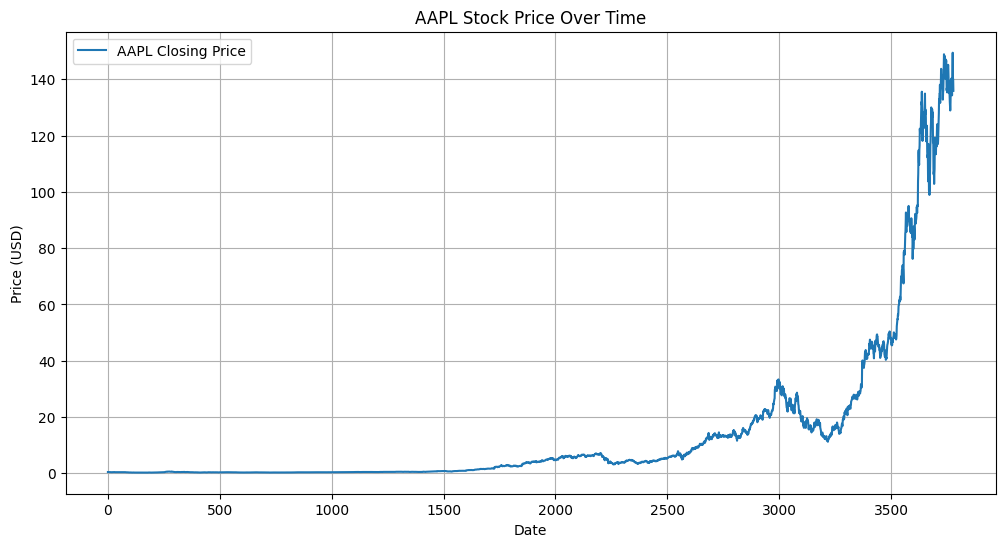

In [6]:
# Plot the 'Close' prices for the AAPL ticker
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='AAPL Closing Price')
plt.title("NVDA Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

# 100-days Moving Average

---



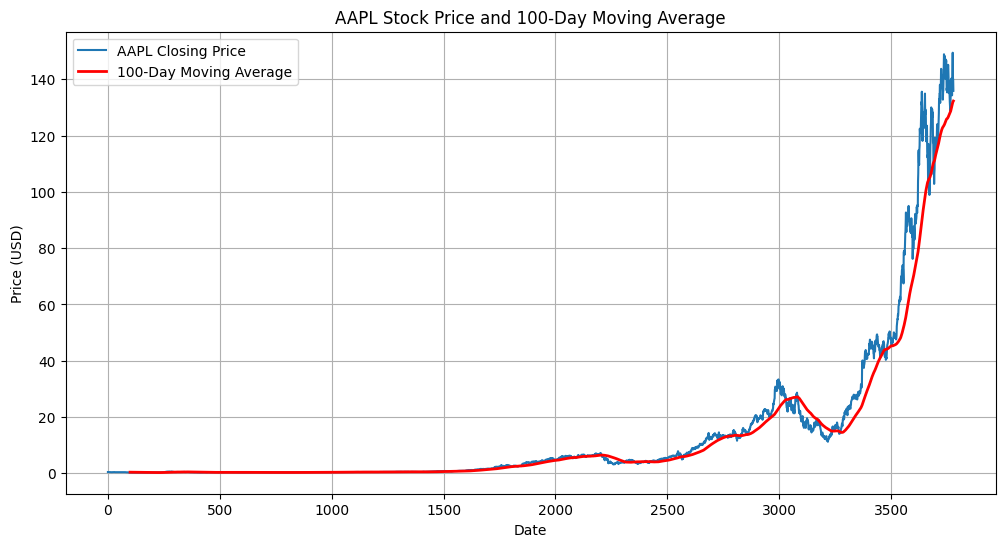

In [7]:
# Calculate the 100-day moving average
ma100 = df['Close'].rolling(window=100).mean()

# Plot the closing prices and the 100-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='AAPL Closing Price')
plt.plot(ma100, 'r', label='100-Day Moving Average', linewidth=2)
plt.title('NVDA Stock Price and 100-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

# 200-day Moving Average
---



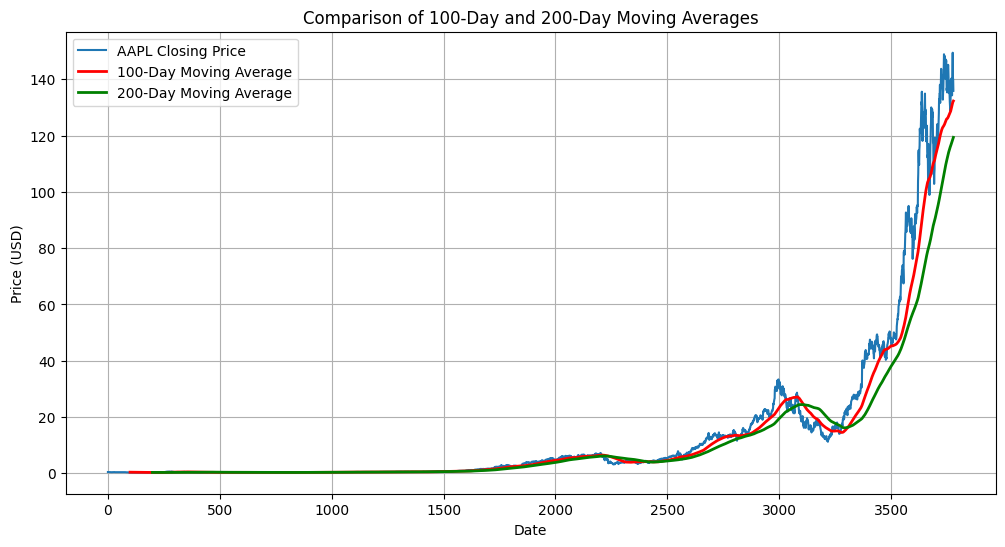

In [8]:
# Calculate the 200-day moving average
ma200 = df['Close'].rolling(window=200).mean()

# Plot the closing prices, 100-day moving average, and 200-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='AAPL Closing Price')
plt.plot(ma100, 'r', label='100-Day Moving Average', linewidth=2)
plt.plot(ma200, 'g', label='200-Day Moving Average', linewidth=2)
plt.title('Comparison of 100-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
df.shape

(3780, 5)

# Split the data into training and testing

In [10]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2646, 7)
(1134, 7)


# Normalize the dataset

---



In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Extract the 'Close' prices as a numpy array
train_close = train.iloc[:, 4:5].values  # Assuming 'Close' is the 5th column
test_close = test.iloc[:, 4:5].values

# Normalize the training data
data_training_array = scaler.fit_transform(train_close)

# Prepare the training data
x_train = []
y_train = []

# Use the previous 100 days' data to predict the next day's closing price
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i, 0])  # 100 previous days
    y_train.append(data_training_array[i, 0])       # Next day's price

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [12]:
x_train.shape

(2546, 100)

# Implementing the LSTM model

---



In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Initialize the LSTM model
model = Sequential()

# First LSTM layer with 50 units and ReLU activation
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Second LSTM layer with 60 units and ReLU activation
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Dropout layer

# Third LSTM layer with 80 units and ReLU activation
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Dropout layer

# Fourth LSTM layer with 120 units and ReLU activation
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer

# Output layer with a single neuron to predict the stock price
model.add(Dense(units=1))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [15]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 0.0374 - mean_absolute_error: 0.1219
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0053 - mean_absolute_error: 0.0406
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 0.0033 - mean_absolute_error: 0.0324
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 0.0034 - mean_absolute_error: 0.0334
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0034 - mean_absolute_error: 0.0342
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0031 - mean_absolute_error: 0.0322
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 0.0026 - mean_absolute_error: 0.0297
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0026 - mean_absolute_error: 0.0298
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0026 - mean_absolute_error: 0.0288
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0026 - mean_absolute_error: 0.0310
Epoch 11/100
80/80

In [16]:
model.save('keras_model.h5')

In [17]:
test_close.shape

(1134, 1)

In [18]:
past_100_days = pd.DataFrame(train_close[-100:])

In [19]:
test_df = pd.DataFrame(test_close)

In [20]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [21]:
final_df.head()

,0
0,7.15000
1,7.12150
2,7.53725
3,7.40875
4,7.26650


In [22]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01837365],
       [0.01817477],
       [0.02107597],
       ...,
       [0.94550001],
       [0.92840339],
       [0.90509616]])

In [23]:
input_data.shape

(1234, 1)

# Testing the model

---



In [24]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [25]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1134, 100, 1)
(1134,)


# Making predictions
---



In [26]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [27]:
y_pred.shape

(1134, 1)

In [28]:
y_test

array([0.03989099, 0.04090458, 0.03843604, ..., 0.94550001, 0.92840339,
       0.90509616])

In [29]:
y_pred

array([[0.06068694],
       [0.06100082],
       [0.06136765],
       ...,
       [0.96263766],
       [0.97015053],
       [0.97073424]], dtype=float32)

In [30]:
scaler.scale_

array([0.00697822])

In [31]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

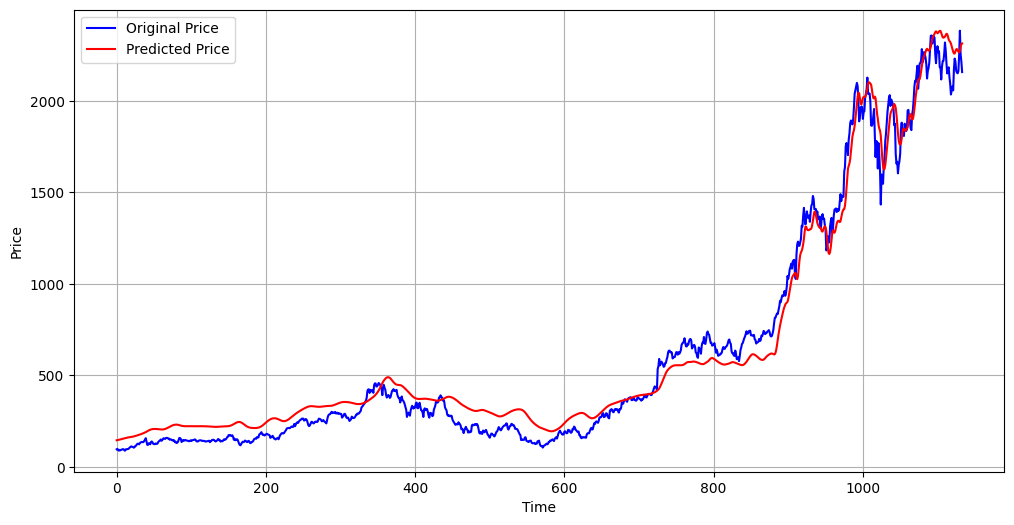

In [32]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [33]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 12.88%


Calculation of R2 score

In [34]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9794975100925372


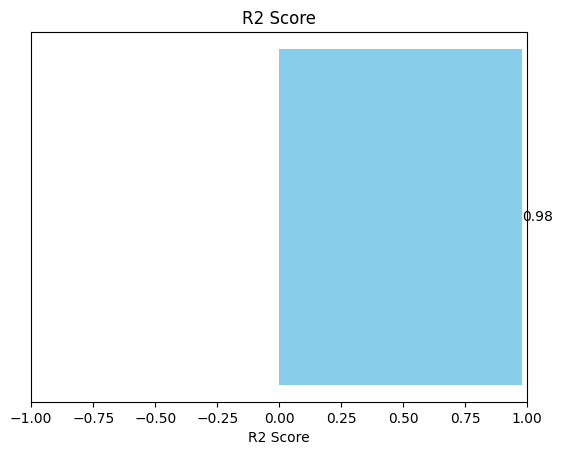

In [35]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

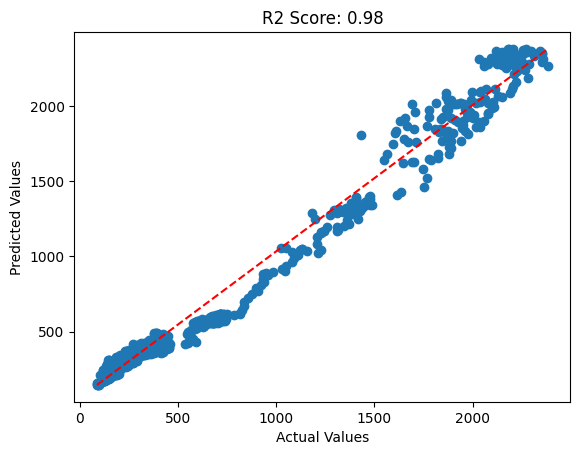

In [36]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

## Predicting Tomorrow's price


In [37]:
# Assume test_df looks like this, without headers:
#   0
# 0 88.254997
# 1 87.820000
# 2 90.000000
# ...

# First, we need to access the last price from the `test_df`
today_price = test_df.iloc[-1, 0]  # Access the last row, first column

# Prepare the input data for the next prediction (last 100 data points)
# Since we don't know the exact shape of `input_data` here, we assume it's in the correct form
last_100_scaled = input_data[-100:]
last_100_scaled = np.array(last_100_scaled).reshape(1, -1, 1)

# Predict tomorrow's price
predicted_price_scaled = model.predict(last_100_scaled)

# Inverse transform to get the original price
predicted_price_original = scaler.inverse_transform(predicted_price_scaled)

# Determine if tomorrow's price is higher or lower
if predicted_price_original[0, 0] > today_price:
    print("The stock price is predicted to go higher tomorrow.")
else:
    print("The stock price is predicted to go lower tomorrow.")

# Output the predicted price for tomorrow
print(f"Predicted stock price for tomorrow: {predicted_price_original[0, 0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The stock price is predicted to go higher tomorrow.
Predicted stock price for tomorrow: 143.05
